In [1]:
from Chemometrics.basic import *
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'

In [2]:
with open('./洋河典型.csv') as f:
    df =pd.read_csv(f,delimiter='\t')
d = df.dropna(axis=1,how='all').dropna(axis=0)

In [3]:
from sklearn.preprocessing import LabelEncoder
y = d['分类名称']
X = d.loc[:,'1':]

In [4]:
#方差分析

In [5]:
from sklearn.feature_selection import SelectKBest, f_classif

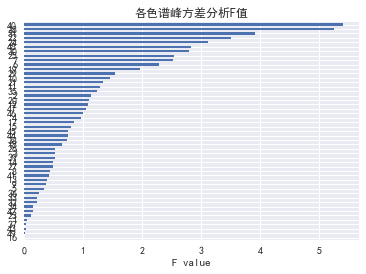

In [6]:
a = SelectKBest(f_classif,k='all').fit(X,y)
s_F = pd.Series(abs(a.scores_),index=X.columns)
s_F.sort_values().plot.barh()
plt.title('各色谱峰方差分析F值')
plt.xlabel('F value')

In [7]:
X_ = X.loc[:,s_F.sort_values().index[:10]]

In [8]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_,y,random_state=1,stratify=y)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

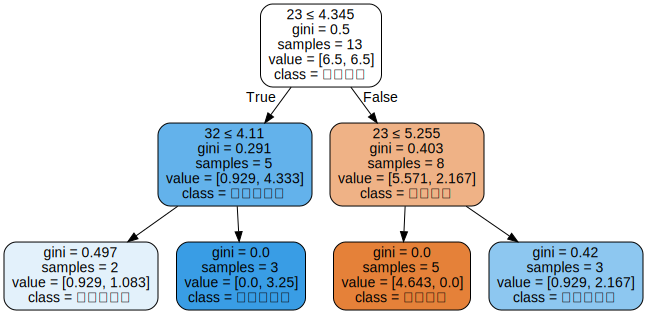

In [10]:
dt_fit = DecisionTreeClassifier(random_state=1,class_weight='balanced',min_samples_leaf=2).fit(X_,y)
plot_tree(dt_fit,X_.columns)

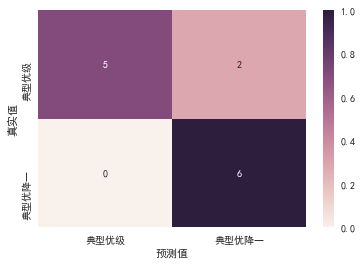

In [12]:
plot_ConfusionMatrix(confusion_matrix(y,dt_fit.predict(X_)),dt_fit.classes_)

In [13]:
dt = DecisionTreeClassifier(random_state=1,class_weight='balanced',min_samples_leaf=2)

In [14]:
para_grid = {'min_samples_leaf':range(2,5)}
grid = GridSearchCV(dt,param_grid=para_grid).fit(X_train,y_train)

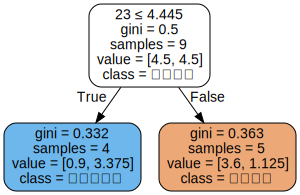

In [15]:
yt_pred = grid.predict(X_train)
plot_tree(grid.best_estimator_,X_.columns)

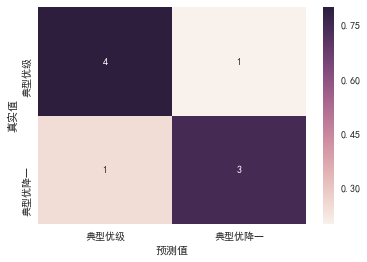

In [17]:
from sklearn.metrics import confusion_matrix
plot_ConfusionMatrix(confusion_matrix(y_train,yt_pred),np.unique(y))

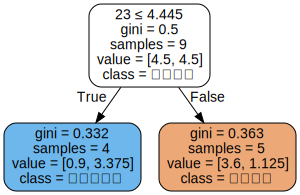

In [20]:
plot_tree(grid.best_estimator_,X_.columns)

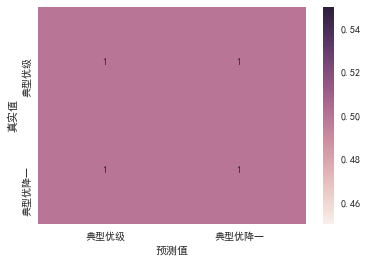

In [21]:
yte_pred = grid.predict(X_test)
plot_ConfusionMatrix(confusion_matrix(y_test,yte_pred),np.unique(y))

---
# random forests

In [22]:
rf = RandomForestClassifier(class_weight='balanced',random_state=1,n_jobs=-1,n_estimators=20)

In [23]:
#调参
para_grid = {'n_estimators': range(5,20),'min_samples_leaf':range(2,5)}
grid = GridSearchCV(rf,param_grid=para_grid,n_jobs=-1)
grid.fit(X_train,y_train)
grid.best_params_

{'min_samples_leaf': 2, 'n_estimators': 16}

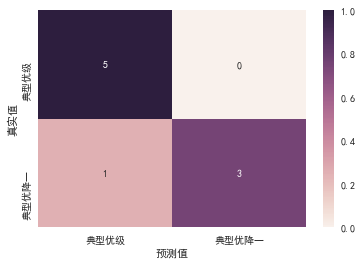

In [24]:
#train 拟合效果
preds_ = grid.predict(X_train)
plot_ConfusionMatrix(confusion_matrix(y_train,preds_),np.unique(y))

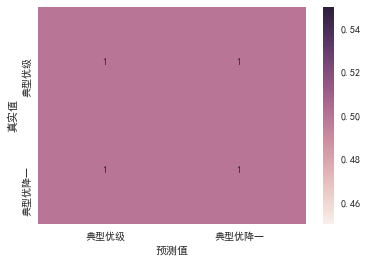

In [25]:
#test 预测效果
preds = grid.predict(X_test)
plot_ConfusionMatrix(confusion_matrix(y_test,preds),np.unique(y))

In [26]:
#todo pipe preprocessing feature selection